<a href="https://colab.research.google.com/github/sedaliSedalian/CNN-by-keras/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

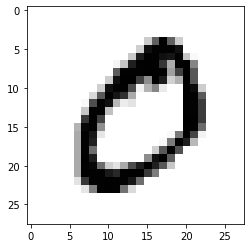

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
plt.imshow (train_images[1],cmap='binary')

# preprocess

In [3]:
print ( ' train image dimension :' , train_images.ndim)
print ( ' train image  shape :' , train_images.shape)
print ( ' train image  type:' , train_images.dtype)

 train image dimension : 3
 train image  shape : (60000, 28, 28)
 train image  type: uint8


In [4]:
X_train=train_images.reshape(60000,28,28,1)
X_test=test_images.reshape(10000,28,28,1)

In [5]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [6]:
X_train /=255
X_test /=255

In [7]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(train_labels)
Y_test=np_utils.to_categorical(test_labels)

# Create Model

In [8]:
from keras.models import Model
from keras import layers

In [9]:
my_input=layers.Input (shape=(28,28,1))
conv1=layers.Conv2D (16,3,activation='relu', padding='same',strides=1)(my_input)
pool1=layers.MaxPool2D(pool_size=2)(conv1)
conv2=layers.Conv2D (32,3,activation='relu', padding='same',strides=1)(pool1)
pool2=layers.MaxPool2D(pool_size=2)(conv2)
flat=layers.Flatten()(pool2)
out=layers.Dense(10,activation = 'softmax')(flat)

In [10]:
myModel=Model(my_input,out)

myModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690 

In [11]:
myModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model (Fitting)

In [12]:
import datetime
start=datetime.datetime.now()
trained_model=myModel.fit(X_train,Y_train , batch_size=128 , epochs=5 , validation_split=0.2)
end=datetime.datetime.now()
Total_time_training=end-start
print ('Total_time_training:',Total_time_training )

Epoch 1/5
375/375 [==============================] - 26s 68ms/step - loss: 0.3868 - accuracy: 0.8936 - val_loss: 0.1188 - val_accuracy: 0.9645
Epoch 2/5
375/375 [==============================] - 25s 67ms/step - loss: 0.0979 - accuracy: 0.9706 - val_loss: 0.0834 - val_accuracy: 0.9775
Epoch 3/5
375/375 [==============================] - 25s 67ms/step - loss: 0.0691 - accuracy: 0.9793 - val_loss: 0.0661 - val_accuracy: 0.9810
Epoch 4/5
375/375 [==============================] - 25s 67ms/step - loss: 0.0562 - accuracy: 0.9832 - val_loss: 0.0645 - val_accuracy: 0.9808
Epoch 5/5
375/375 [==============================] - 25s 67ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0531 - val_accuracy: 0.9833
Total_time_training: 0:02:06.719228


In [18]:
history=trained_model.history

losses=history['loss']
val_losses=history['val_loss']
ac=history['accuracy']
val_ac=history['val_accuracy']

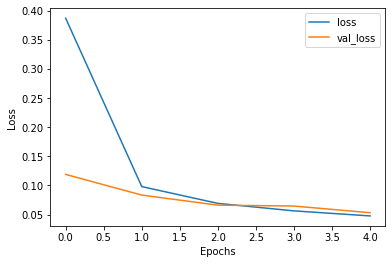

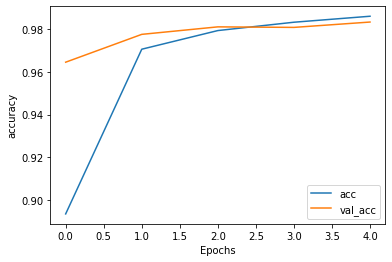

In [19]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(ac)
plt.plot(val_ac)
plt.legend(['acc','val_acc'])

# Evaluation

In [20]:
predicted_labels=myModel.predict(X_test)
#plt.imshow (test_images[0],cmap='binary')
test_loss,test_acc=myModel.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0412 - accuracy: 0.9856
